In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
(X_train,y_train), (X_test,y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:10]


array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [17]:
w_grid=10
l_grid=10
labels=['aeroplane', 'automobile', 'bird', 'cat', 'deer','dog','frog','horse', 'ship' , 'truck']

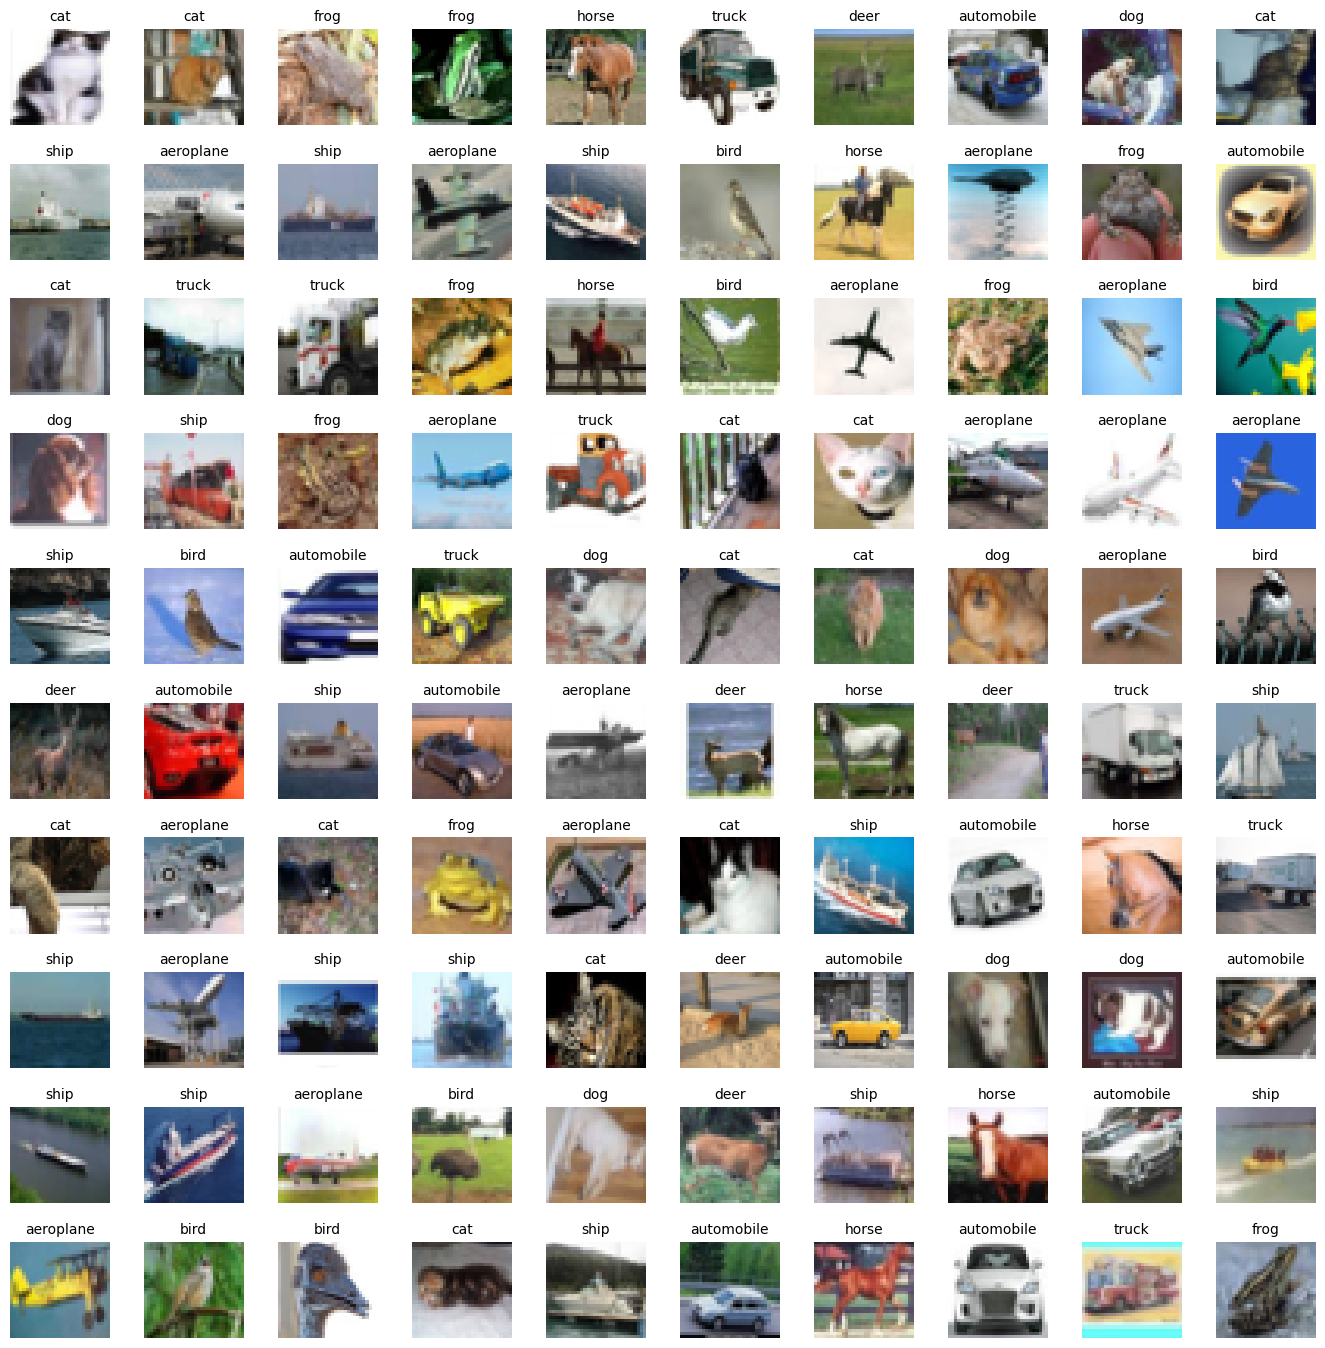

In [21]:
fig, axes =plt.subplots(l_grid, w_grid, figsize=(17, 17))
axes=axes.ravel()
n_train=len(X_train)

for i in np.arange(0, w_grid*l_grid):
    index =np.random.randint(0, n_train)
    axes[i].imshow(X_train[index, 1:])
    lab=int(y_train[index])
    axes[i].set_title(labels[lab], fontsize=10)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [ ]:
#  Data preprocessing

In [48]:
X_train = X_train/255
X_test =X_test/255
print(X_train[49999][31][31])

[8.45600554e-30 8.45600554e-30 8.35225087e-30]


In [51]:
y_cat_train= to_categorical(y_train)
print(y_train[49999])

[1]


In [24]:
y_cat_test=to_categorical(y_test)

In [54]:
model =Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape =(32,32,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape =(32,32,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))


model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape =(32,32,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape =(32,32,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(3,3), input_shape =(32,32,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape =(32,32,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation="relu"))

metrics=['accuracy', 
         tf.keras.metrics.Precision(name='precision'),
         tf.keras.metrics.Recall(name='recall')]

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=metrics)
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_24 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_25 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

In [55]:
early_stop =EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
batch_size=32
cnn=model.fit(X_train, y_cat_train, epochs=10, validation_data=(X_test, y_cat_test))